In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("avocado.csv")
data = data.drop("Unnamed: 0", axis=1)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Data starts from 2015-01-04 and ends at the 2018-03-25
            region  AveragePrice  Total Volume
Date                                          
2016-01-03  Albany         1.390     75091.825
2016-01-10  Albany         1.555     40398.910
2016-01-17  Albany         1.465     60734.570
2016-01-24  Albany         1.525     48798.000
2016-01-31  Albany         1.475     51672.130


,AveragePrice,Total Volume
AveragePrice,1.000000,-0.785028
Total Volume,-0.785028,1.000000


<Figure size 1080x576 with 0 Axes>

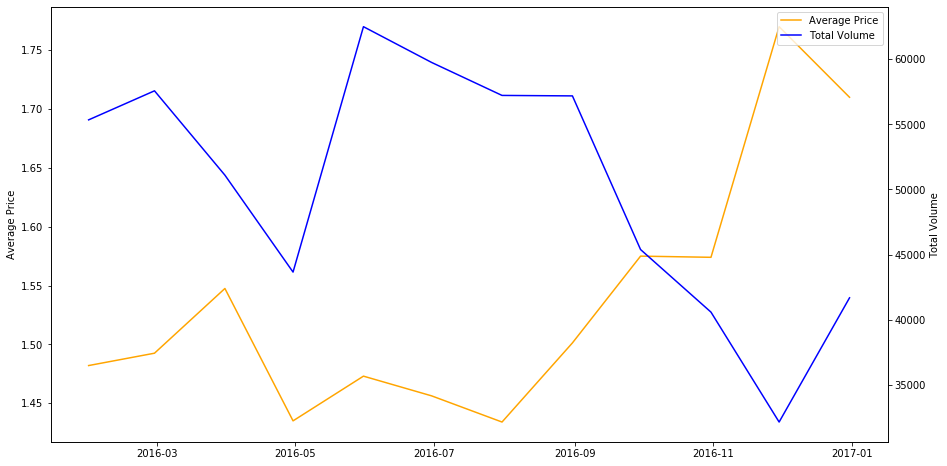

In [67]:
#print(pd.date_range(data["Date"].min(), data["Date"].max(), freq="W").difference(pd.DatetimeIndex(data["Date"]))) doesn't work with pd.Index
print("Data starts from {} and ends at the {}".format(data["Date"].min(), data["Date"].max()))
data_by_date_region = data.groupby(["Date","region"])[["AveragePrice","Total Volume"]].mean()
idx = pd.IndexSlice
data_by_date_region.reset_index(inplace=True)
plt.figure(figsize=(15,8))
albany = data_by_date_region[(data_by_date_region["region"] == "Albany") & (data_by_date_region["Date"] <= "2016-12-31") & (data_by_date_region["Date"] >= "2016-01-01")]
#albany["monthly"] = albany["Date"].
albany.set_index("Date", inplace=True)
albany.index = pd.to_datetime(albany.index)
print(albany.head())
resample = albany.resample("M").mean()
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.plot(resample["AveragePrice"], color="orange", label="Average Price")
ax1.set_ylabel("Average Price")
ax2 = ax1.twinx()
ax2.plot(resample["Total Volume"], color="blue", label="Total Volume")
ax2.set_ylabel("Total Volume")
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
resample.loc[:,["AveragePrice", "Total Volume"]].dropna().corr()
#plt.plot(x= data_by_date_region.loc[idx[:, "Albany"], "Date"], y=data_by_date_region.loc[idx[:, "Albany"], "Total Volume"])

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.plot(albany["Date"], albany["AveragePrice"], color="orange", label="Average Price")
ax1.set_ylabel("Average Price")
ax2 = ax1.twinx()
ax2.plot(albany["Date"], albany["Total Volume"], color="blue", label="Total Volume")
ax2.set_ylabel("Total Volume")
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)